## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import scipy.stats as stats
from imblearn.over_sampling import SMOTE


In [ ]:
# Đọc dữ liệu
data = pd.read_csv('./Student Depression Dataset.csv')
df_train, df_val = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Depression'])
print(df_train.head().T)

                                           1657       24995      27613  \
id                                          8551     125925     139260   
Gender                                      Male       Male       Male   
Age                                         18.0       25.0       30.0   
City                                      Jaipur   Vadodara  Ahmedabad   
Profession                               Student    Student    Student   
Academic Pressure                            4.0        3.0        3.0   
Work Pressure                                0.0        0.0        0.0   
CGPA                                        6.02       6.37       9.24   
Study Satisfaction                           1.0        2.0        2.0   
Job Satisfaction                             0.0        0.0        0.0   
Sleep Duration                         7-8 hours  7-8 hours  7-8 hours   
Dietary Habits                          Moderate   Moderate  Unhealthy   
Degree                                

In [7]:
# Kiểm tra và in số lượng bản ghi trùng lặp
duplicates = data.duplicated().sum()
print(f"Số lượng bản ghi trùng lặp: {duplicates}")

Số lượng bản ghi trùng lặp: 0


## Data Exploration and Preprocessing

In [8]:
df = data
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [9]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
# Kiểm tra tỷ lệ dữ liệu mất mát
missing_percentage = data.isnull().mean() * 100
print("Missing Data Percentage:\n", missing_percentage)

Missing Data Percentage:
 id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64


In [11]:
# Fill null values in 'Financial Stress' with the mean of the column
data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)

C:\Users\qbao4\AppData\Local\Temp\ipykernel_7388\1679364851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)


In [12]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [13]:
df.shape

(27901, 18)

**the describtion of the data to see if there are outliers or not or is there any weird tendances in the data**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [15]:
df.describe()


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437269,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


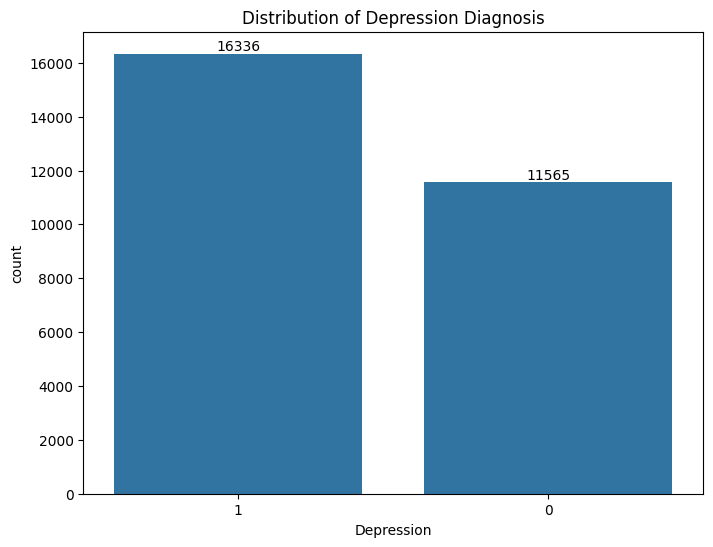

In [16]:
plt.figure(figsize=(8, 6))
order = data['Depression'].value_counts().index  # Sắp xếp đúng thứ tự theo số lượng
ax = sns.countplot(data=data, x='Depression', order=order)
plt.title('Distribution of Depression Diagnosis')
counts = data['Depression'].value_counts()
for i, v in enumerate(counts):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [17]:
X = data.drop('Depression', axis=1)
y = data['Depression']   

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files in the current folder
train_data.to_csv('./train_set.csv', index=False)
val_data.to_csv('./val_set.csv', index=False)
test_data.to_csv('./test_set.csv', index=False)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (16740, 17)
Validation set shape: (5580, 17)
Test set shape: (5581, 17)


In [18]:
# Update the file paths to the correct locations
df_train = pd.read_csv('./train_set.csv')  # Adjust the path as needed
df_val = pd.read_csv('./val_set.csv')      # Adjust the path as needed
df_test = pd.read_csv('./test_set.csv')    # Adjust the path as needed

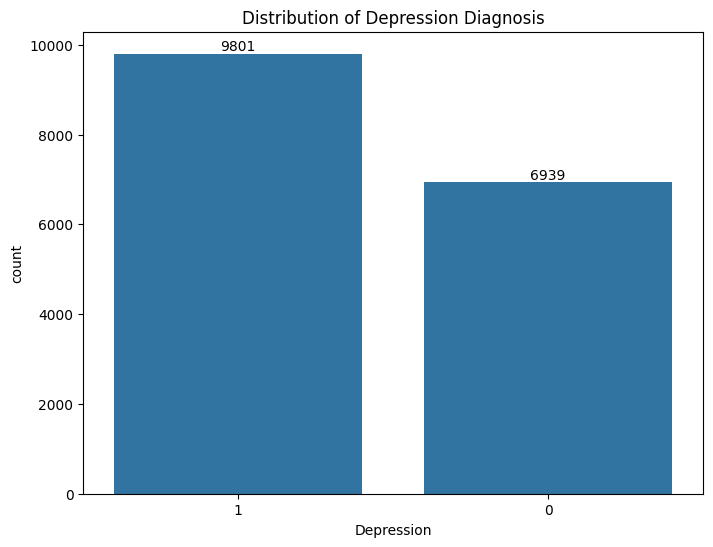

In [19]:
plt.figure(figsize=(8, 6))

# Define the order of categories in the 'Depression' column
order = df_train['Depression'].value_counts().index

ax = sns.countplot(data=df_train, x='Depression', order=order)
plt.title('Distribution of Depression Diagnosis')

# Get the counts for each category
counts = df_train['Depression'].value_counts()

# Annotate the bars with the counts
for i, v in enumerate(counts):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [20]:
df_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000
mean,70251.388232,25.820072,3.139725,0.000418,7.662360,2.952987,0.000478,7.145818,3.137711,0.585484
std,40621.450625,4.908981,1.375456,0.041621,1.463025,1.359770,0.039409,3.704971,1.439244,0.492653
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,34682.250000,21.000000,2.000000,0.000000,6.330000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70441.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105702.750000,30.000000,4.000000,0.000000,8.910000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,58.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


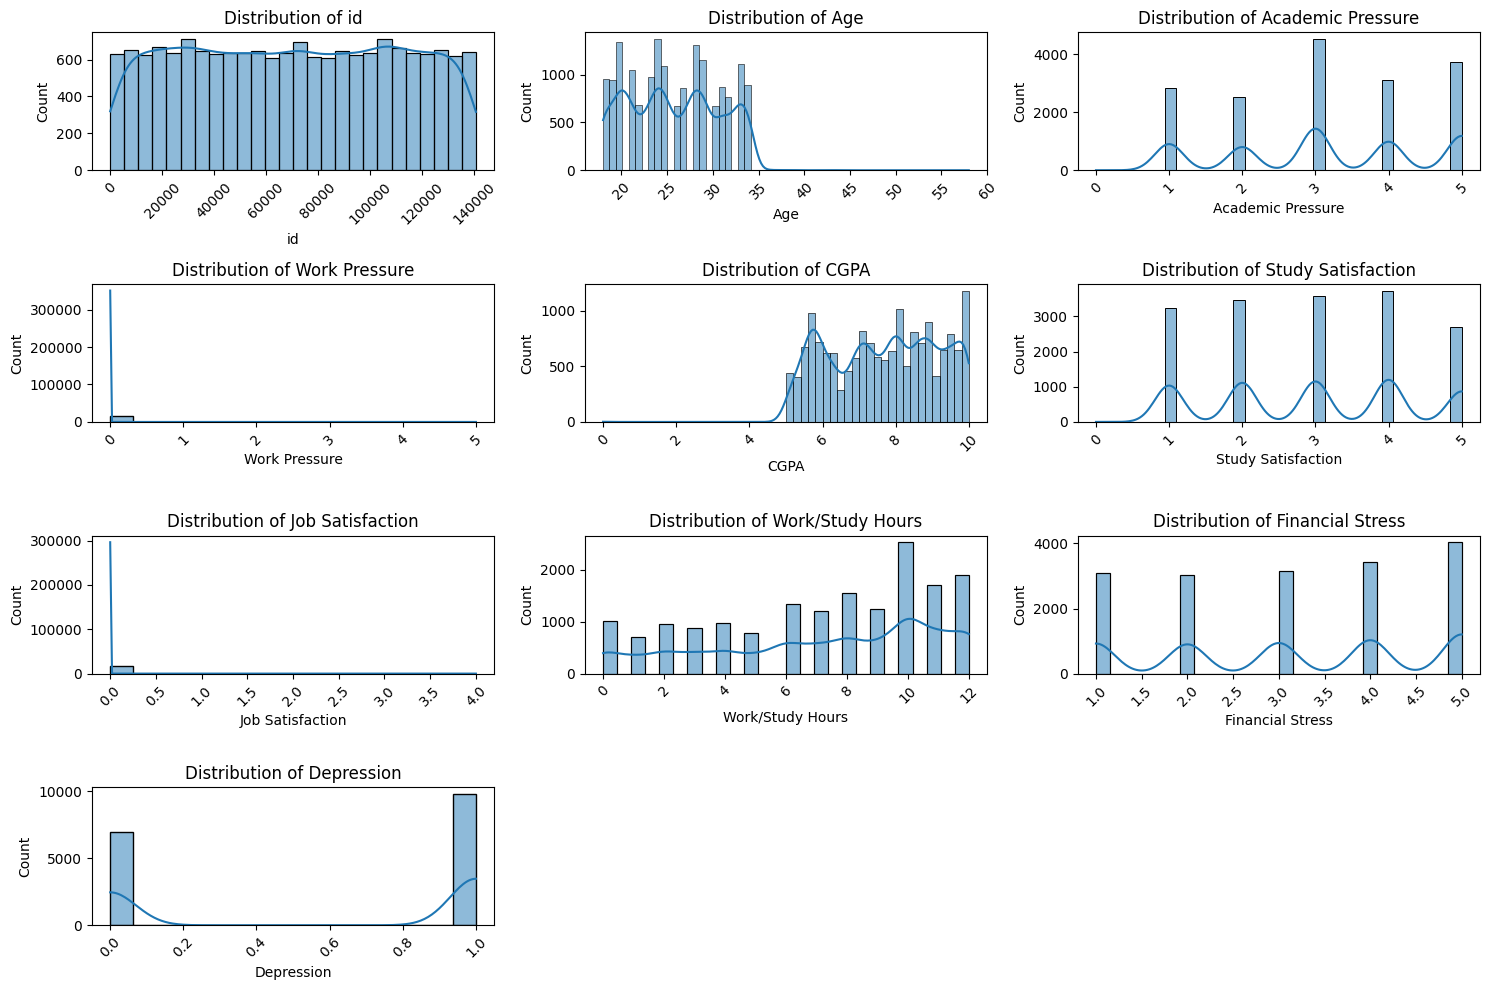

In [21]:
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
# Create a figure with subplots for each numerical feature
# Adjust the number of rows to ensure enough subplots for all features
n_rows = (len(numerical_features) + 2) // 3  # Add 2 to ensure rounding up
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

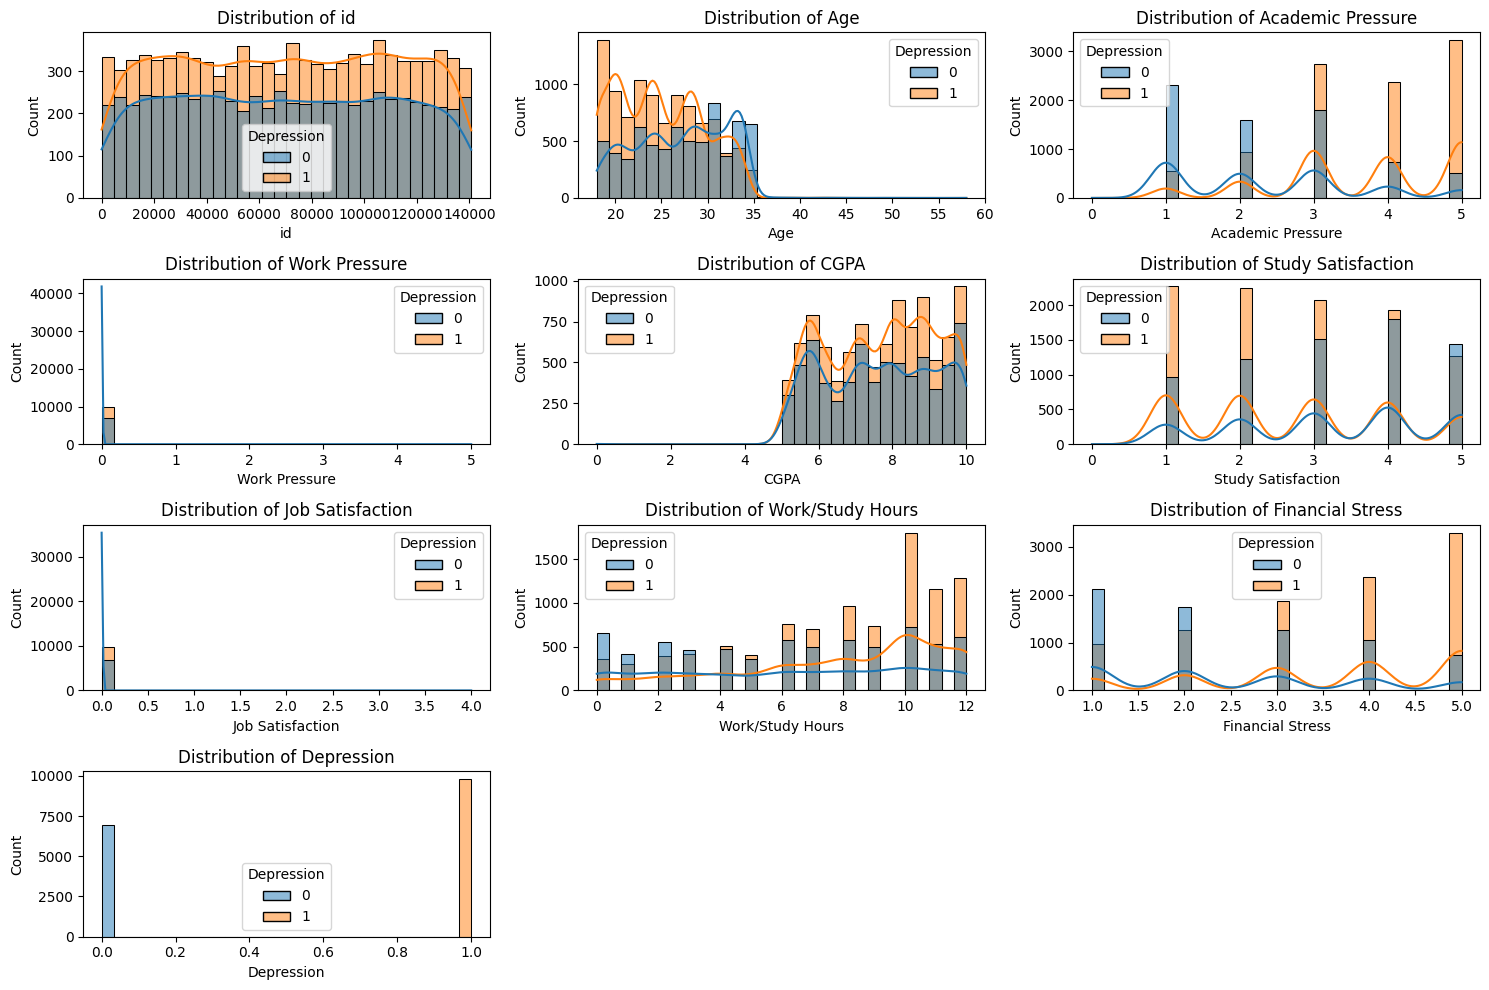

In [22]:

# Adjust the number of rows to ensure enough subplots for all features
n_rows = (len(numerical_features) + 2) // 3  # Add 2 to ensure rounding up
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, hue="Depression", bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


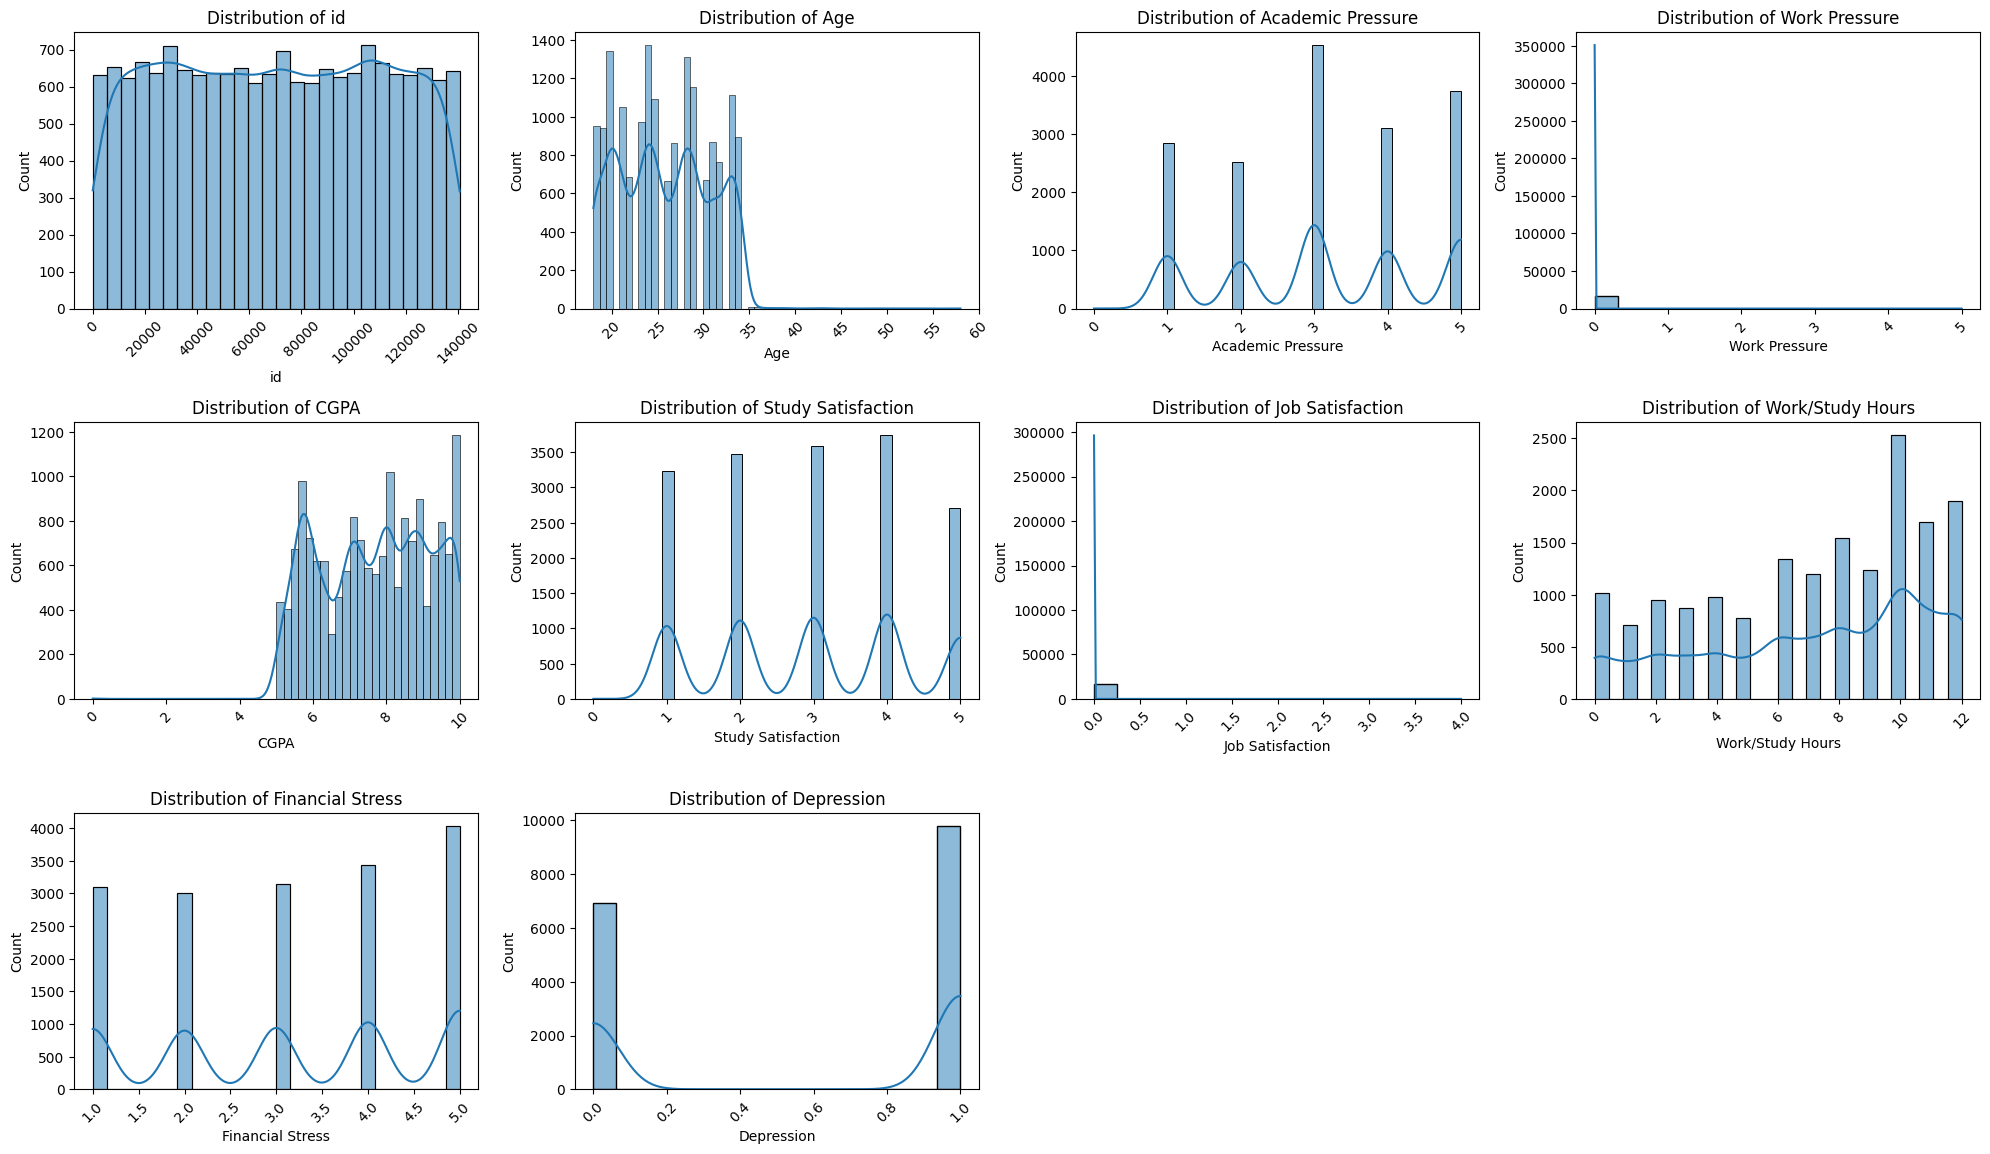

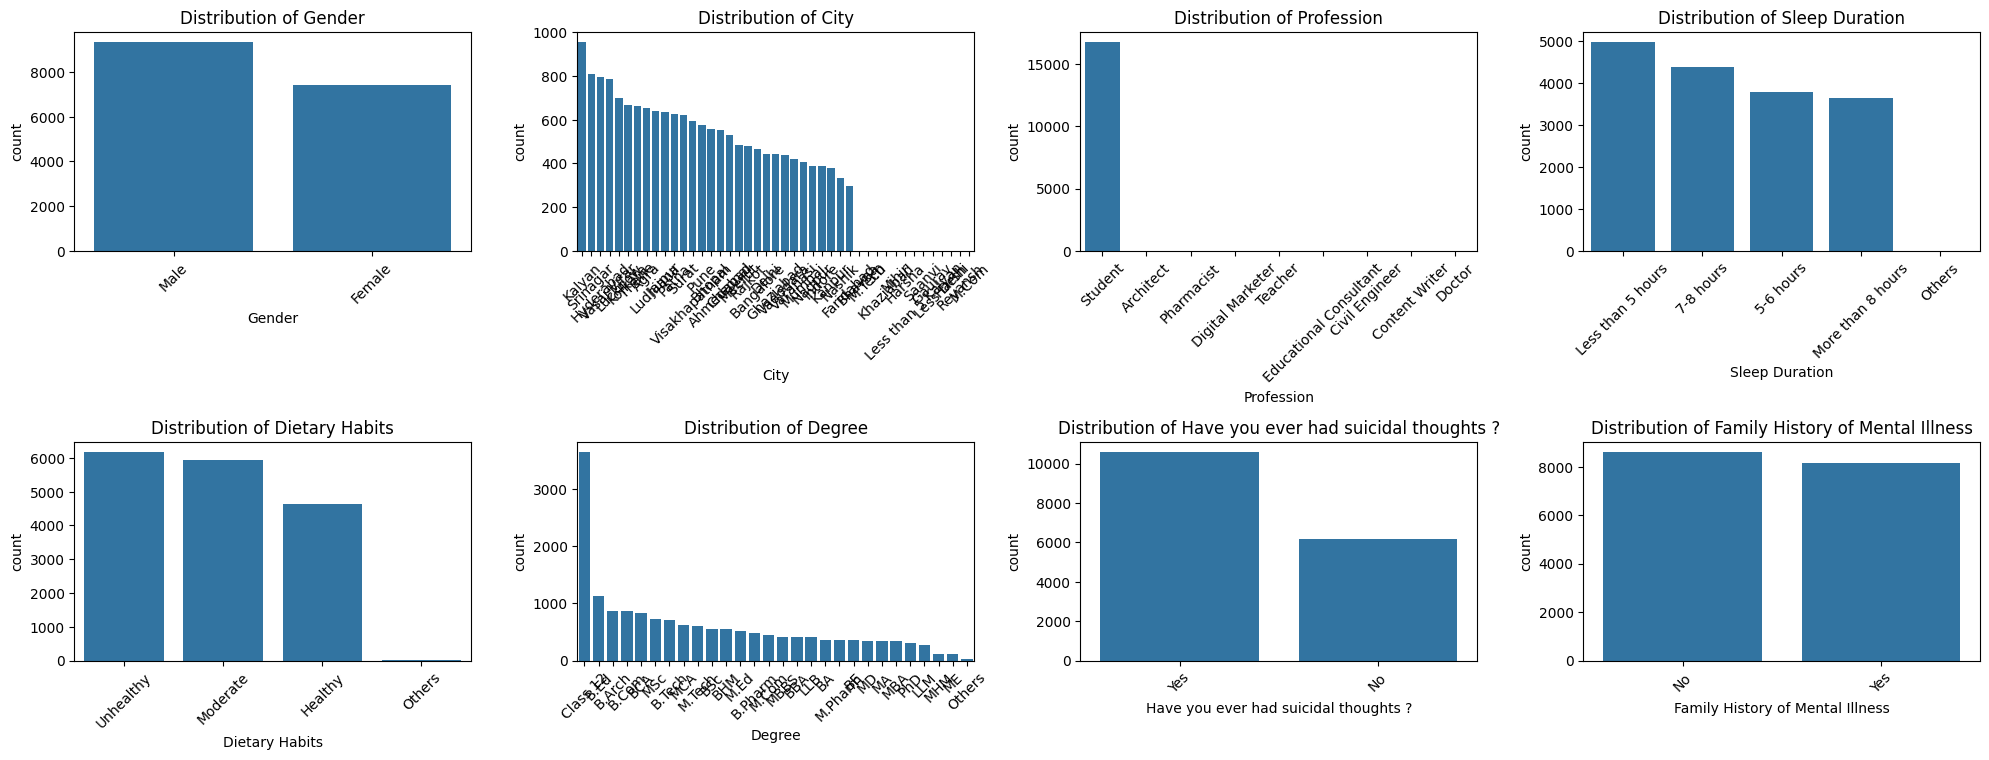

In [23]:
# Separate numerical and categorical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_train.select_dtypes(include=['object']).columns

# Plot numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.histplot(data=df_train, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.countplot(data=df_train, x=feature, order=df_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


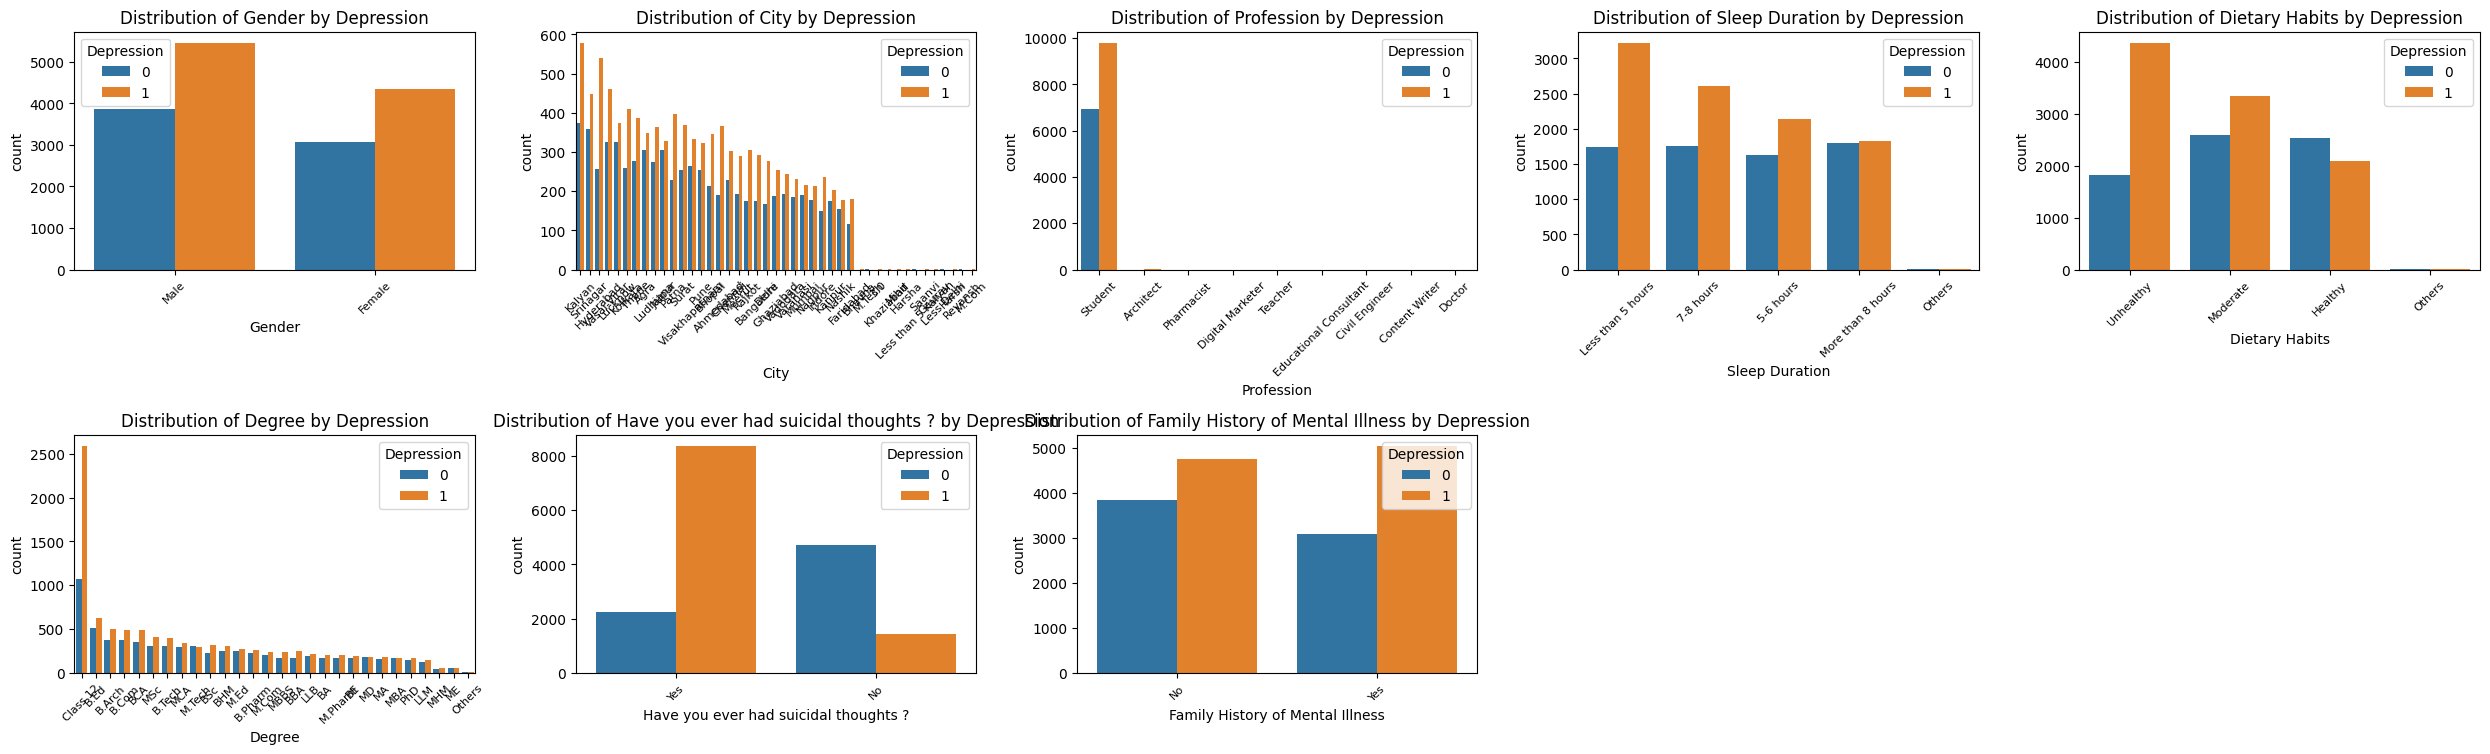

In [24]:
plt.figure(figsize=(25, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 5, i)  # Điều chỉnh kích thước lưới dựa trên số lượng đặc trưng
    sns.countplot(data=df_train, x=feature, hue='Depression', order=df_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature} by Depression')
    plt.xticks(rotation=45, fontsize=8)  # Xoay nhãn trục x để dễ đọc hơn
    plt.tight_layout()

plt.show()

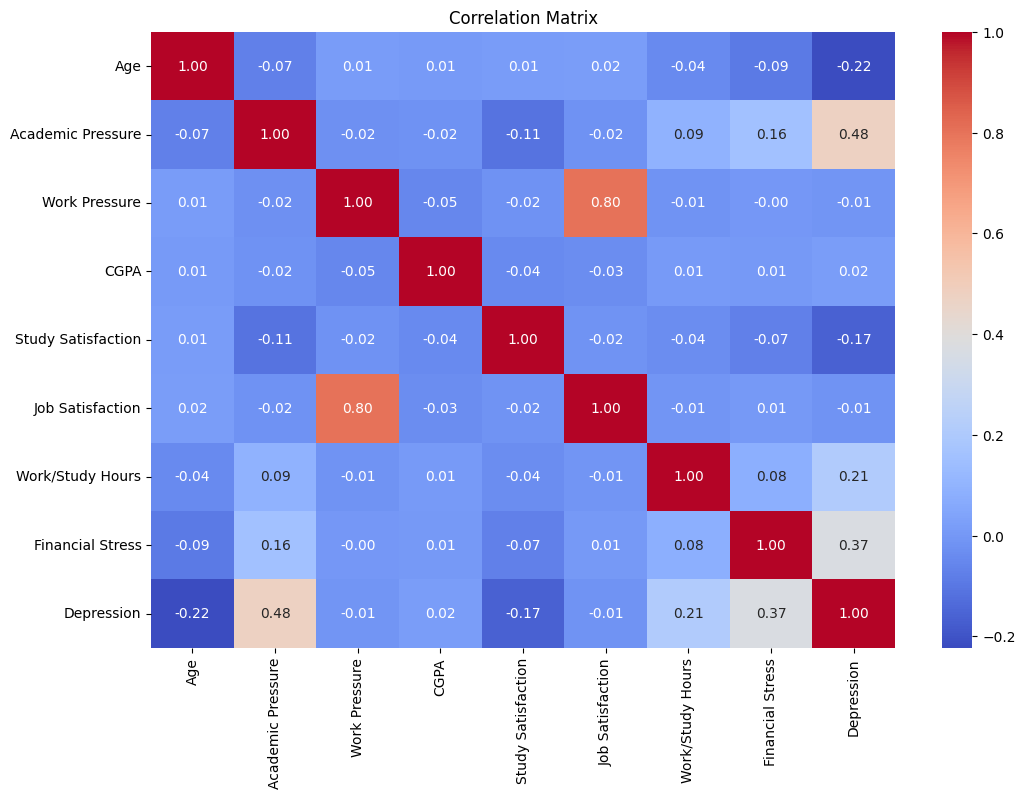

In [25]:
# Chọn các cột số để tính ma trận tương quan
data = df_train[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
                 'Financial Stress', 'Depression']]

# Tính ma trận tương quan
correlation_matrix = data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
binary_features_yes_no = [
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

# Áp dụng one-hot encoding cho các cột nhị phân
df_train = pd.get_dummies(df_train, columns=binary_features_yes_no, drop_first=True)
df_val = pd.get_dummies(df_val, columns=binary_features_yes_no, drop_first=True)
df_test = pd.get_dummies(df_test, columns=binary_features_yes_no, drop_first=True)

df_train.head().T


,0,1,2,3,4
id,70254,99589,30507,79856,82992
Gender,Male,Male,Male,Female,Male
Age,19.0,33.0,32.0,25.0,32.0
City,Hyderabad,Meerut,Ludhiana,Visakhapatnam,Nagpur
Profession,Student,Student,Student,Student,Student
Academic Pressure,5.0,2.0,4.0,5.0,5.0
Work Pressure,0.0,0.0,0.0,0.0,0.0
CGPA,9.89,5.32,6.16,9.63,6.16
Study Satisfaction,5.0,4.0,3.0,2.0,5.0
Job Satisfaction,0.0,0.0,0.0,0.0,0.0


In [ ]:
categorical_features_non_yes_no = ['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']

# Ensure the columns in categorical_features_non_yes_no exist in df_train, df_val, and df_test before applying one-hot encoding
existing_columns_train = [col for col in categorical_features_non_yes_no if col in df_train.columns]
existing_columns_val = [col for col in categorical_features_non_yes_no if col in df_val.columns]
existing_columns_test = [col for col in categorical_features_non_yes_no if col in df_test.columns]

# Apply one-hot encoding only to the existing columns
if existing_columns_train:
	df_train = pd.get_dummies(df_train, columns=existing_columns_train, drop_first=True)
if existing_columns_val:
	df_val = pd.get_dummies(df_val, columns=existing_columns_val, drop_first=True)
if existing_columns_test:
	df_test = pd.get_dummies(df_test, columns=existing_columns_test, drop_first=True)

# Display the result after one-hot encoding
df_train.head().T

,0,1,2,3,4
id,70254,99589,30507,79856,82992
Gender,Male,Male,Male,Female,Male
Age,19.0,33.0,32.0,25.0,32.0
Academic Pressure,5.0,2.0,4.0,5.0,5.0
Work Pressure,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Degree_ME,False,False,False,False,False
Degree_MHM,False,False,False,False,False
Degree_MSc,False,False,False,False,False
Degree_Others,False,False,False,False,False


In [28]:
# Ensure numerical_features only contains columns that exist in df_train
existing_numerical_features = [col for col in numerical_features if col in df_train.columns]

if existing_numerical_features:
	scaler = StandardScaler()
	df_train[existing_numerical_features] = scaler.fit_transform(df_train[existing_numerical_features])

	# Transform validation and test data using the same scaler
	df_val[existing_numerical_features] = scaler.transform(df_val[existing_numerical_features])  
	df_test[existing_numerical_features] = scaler.transform(df_test[existing_numerical_features])

df_train

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.000064,Male,-1.389346,1.352519,-0.010047,1.522672,1.505456,-0.012127,0.770388,1.293974,...,False,False,False,False,False,False,False,False,False,False
1,0.722241,Male,1.462654,-0.828641,-0.010047,-1.601087,0.770016,-0.012127,-1.658853,-0.790515,...,False,False,False,False,False,False,False,False,False,False
2,-0.978438,Male,1.258940,0.625465,-0.010047,-1.026917,0.034575,-0.012127,0.770388,0.599144,...,False,False,False,False,False,False,False,False,False,False
3,0.236449,Female,-0.167060,1.352519,-0.010047,1.344953,-0.700865,-0.012127,0.230557,1.293974,...,False,False,False,False,False,False,False,False,False,False
4,0.313652,Male,1.258940,1.352519,-0.010047,-1.026917,1.505456,-0.012127,0.770388,-1.485345,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16735,0.637333,Female,0.444083,0.625465,-0.010047,-0.603125,0.034575,-0.012127,0.770388,-0.790515,...,False,False,False,False,True,False,False,False,False,False
16736,-0.545403,Male,1.666369,-0.101588,-0.010047,0.832301,0.034575,-0.012127,0.230557,-1.485345,...,False,False,False,False,False,False,False,False,False,False
16737,-1.071446,Male,0.036654,-0.828641,-0.010047,-0.732996,-0.700865,-0.012127,1.310220,-0.095686,...,False,False,False,False,False,False,False,False,False,False
16738,1.286320,Female,-0.778203,0.625465,-0.010047,-0.384393,-0.700865,-0.012127,1.040304,1.293974,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df_val

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.085539,Female,-1.185632,-0.828641,-0.010047,-0.979069,0.034575,-0.012127,-1.928769,1.293974,...,False,False,False,False,False,False,False,False,False,False
1,1.182603,Female,0.036654,-1.555694,-0.010047,-0.261357,0.770016,-0.012127,-0.309274,-0.790515,...,False,False,False,False,False,False,False,False,False,False
2,-0.991461,Female,0.444083,1.352519,-0.010047,1.215081,-1.436305,-0.012127,1.310220,-1.485345,...,False,False,False,False,False,False,False,False,False,False
3,0.040167,Male,0.851511,-0.101588,-0.010047,0.429015,-1.436305,-0.012127,-0.579190,-0.790515,...,False,False,False,False,False,False,False,False,False,False
4,1.515220,Male,1.462654,-0.101588,-0.010047,-1.430203,0.770016,-0.012127,-0.309274,-1.485345,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,-1.393330,Male,-0.574489,1.352519,-0.010047,0.545216,0.770016,-0.012127,0.500473,1.293974,...,False,False,False,False,False,False,False,True,False,False
5576,0.278078,Female,1.462654,-0.101588,-0.010047,1.372294,-1.436305,-0.012127,-1.119022,-0.095686,...,False,False,False,False,False,False,False,False,False,False
5577,-0.443114,Female,-0.574489,-1.555694,-0.010047,0.852807,0.770016,-0.012127,0.500473,0.599144,...,False,True,False,False,False,False,False,False,False,False
5578,1.304956,Male,-0.574489,-0.101588,-0.010047,-1.416532,-1.436305,-0.012127,1.040304,0.599144,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
X_train = df_train.drop(columns=['Depression'])
y_train = df_train['Depression']

X_val = df_val.drop(columns=['Depression'])
y_val = df_val['Depression']

# Convert continuous target variable to discrete classes
y_train = (y_train > 0).astype(int)  # Convert to binary classes (0 and 1)
y_val = (y_val > 0).astype(int)      # Convert to binary classes (0 and 1)

# Encode categorical variables into numeric format
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Ensure both training and validation sets have the same columns
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán trên tập xác thực
y_pred_val = model.predict(X_val)

# Dự đoán trên tập huấn luyện
y_pred_train = model.predict(X_train)

# Đánh giá mô hình
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2313
           1       0.85      0.89      0.87      3267

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6939
           1       0.86      0.89      0.88      9801

    accuracy                           0.85     16740
   macro avg       0.85      0.84      0.85     16740
weighted avg       0.85      0.85      0.85     16740



In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Định nghĩa tham số cho GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}

# Khởi tạo mô hình SVM
svm_model = SVC()

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Dự đoán trên tập xác thực
y_pred_val = grid_search.best_estimator_.predict(X_val)

# Đánh giá mô hình
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.8482676224611708
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2313
           1       0.85      0.89      0.87      3267

    accuracy                           0.85      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.84      0.85      0.84      5580

